In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [59]:
data=pd.read_csv("Instagram_data.csv",encoding='cp1252')

In [60]:
data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Here’s how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [61]:
data.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [62]:
data.shape

(119, 13)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [64]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Impressions,119.0,5703.99,4843.78,1941.0,3467.0,4289.0,6138.0,36919.0
From Home,119.0,2475.79,1489.39,1133.0,1945.0,2207.0,2602.5,13473.0
From Hashtags,119.0,1887.51,1884.36,116.0,726.0,1278.0,2363.5,11817.0
From Explore,119.0,1078.10,2613.03,0.0,157.5,326.0,689.5,17414.0
From Other,119.0,171.09,289.43,9.0,38.0,74.0,196.0,2547.0
Saves,119.0,153.31,156.32,22.0,65.0,109.0,169.0,1095.0
Comments,119.0,6.66,3.54,0.0,4.0,6.0,8.0,19.0
Shares,119.0,9.36,10.09,0.0,3.0,6.0,13.5,75.0
Likes,119.0,173.78,82.38,72.0,121.5,151.0,204.0,549.0
Profile Visits,119.0,50.62,87.09,4.0,15.0,23.0,42.0,611.0


In [65]:
data.isna().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

<Axes: xlabel='Impressions', ylabel='Count'>

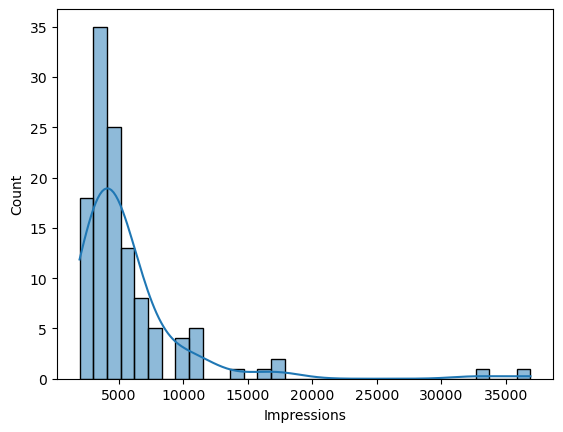

In [66]:
sns.histplot(data=data['Impressions'],kde=True)

<Axes: >

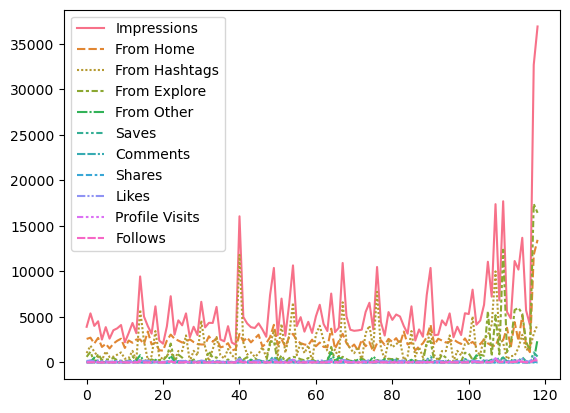

In [67]:
sns.lineplot(data=data)

<Axes: xlabel='Likes', ylabel='Impressions'>

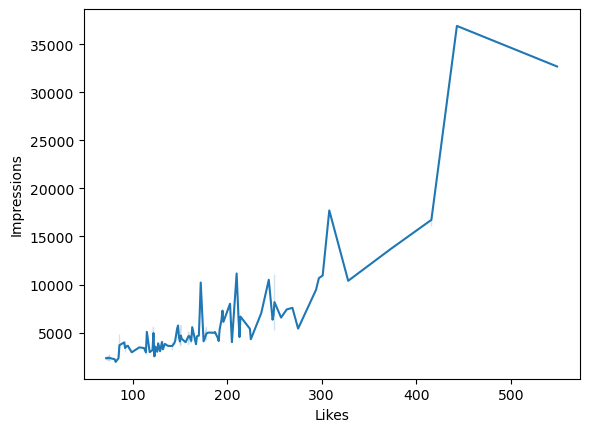

In [68]:
sns.lineplot(x="Likes",y="Impressions",data=data)

In [69]:
data.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

ValueError: could not convert string to float: 'From Home'

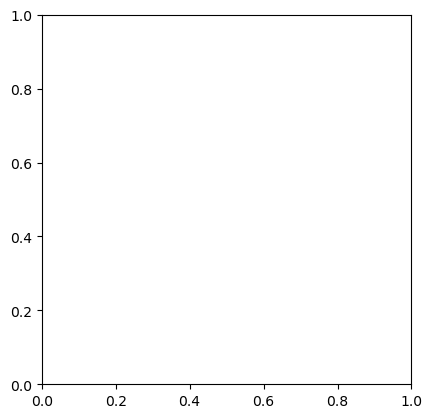

In [70]:
# seaborn doesn't have pie chart(plot)
#pie chart explode
p_labels=['From Home','From Hashtags','From Explore','From Other']
#p_data=data[data.columns[1:5]]
plt.pie(p_data,labels=p_labels)
plt.show()

In [71]:
data.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

<Axes: >

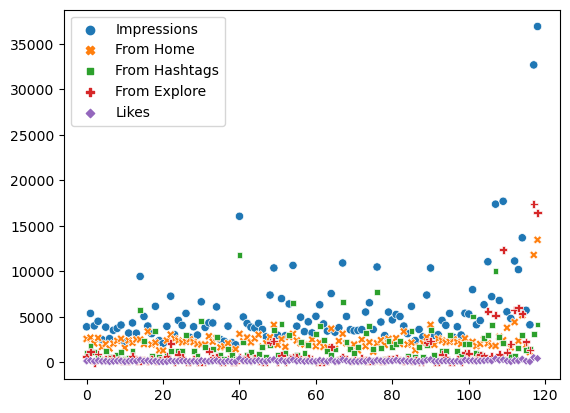

In [72]:
s_data=data[['Impressions','From Home','From Hashtags','From Explore','Likes']]
sns.scatterplot(s_data)

In [73]:
data.corr()

C:\Users\hp\AppData\Local\Temp\ipykernel_17792\2627137660.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
Impressions,1.000000,0.844698,0.560760,0.893607,0.592960,0.779231,-0.028524,0.634675,0.849835,0.760981,0.889363
From Home,0.844698,1.000000,0.177516,0.800573,0.555666,0.768817,0.012716,0.674985,0.698330,0.531076,0.672675
From Hashtags,0.560760,0.177516,1.000000,0.190453,0.229623,0.305929,0.161439,0.219511,0.662124,0.691345,0.555485
From Explore,0.893607,0.800573,0.190453,1.000000,0.495685,0.747803,-0.158565,0.615731,0.653699,0.531850,0.796019
From Other,0.592960,0.555666,0.229623,0.495685,1.000000,0.331907,-0.108703,0.156834,0.393510,0.633080,0.546737
Saves,0.779231,0.768817,0.305929,0.747803,0.331907,1.000000,-0.026912,0.860324,0.845643,0.360628,0.628461
Comments,-0.028524,0.012716,0.161439,-0.158565,-0.108703,-0.026912,1.000000,0.016933,0.123586,0.096714,-0.060631
Shares,0.634675,0.674985,0.219511,0.615731,0.156834,0.860324,0.016933,1.000000,0.707794,0.245361,0.493070
Likes,0.849835,0.698330,0.662124,0.653699,0.393510,0.845643,0.123586,0.707794,1.000000,0.626107,0.746333
Profile Visits,0.760981,0.531076,0.691345,0.531850,0.633080,0.360628,0.096714,0.245361,0.626107,1.000000,0.853152


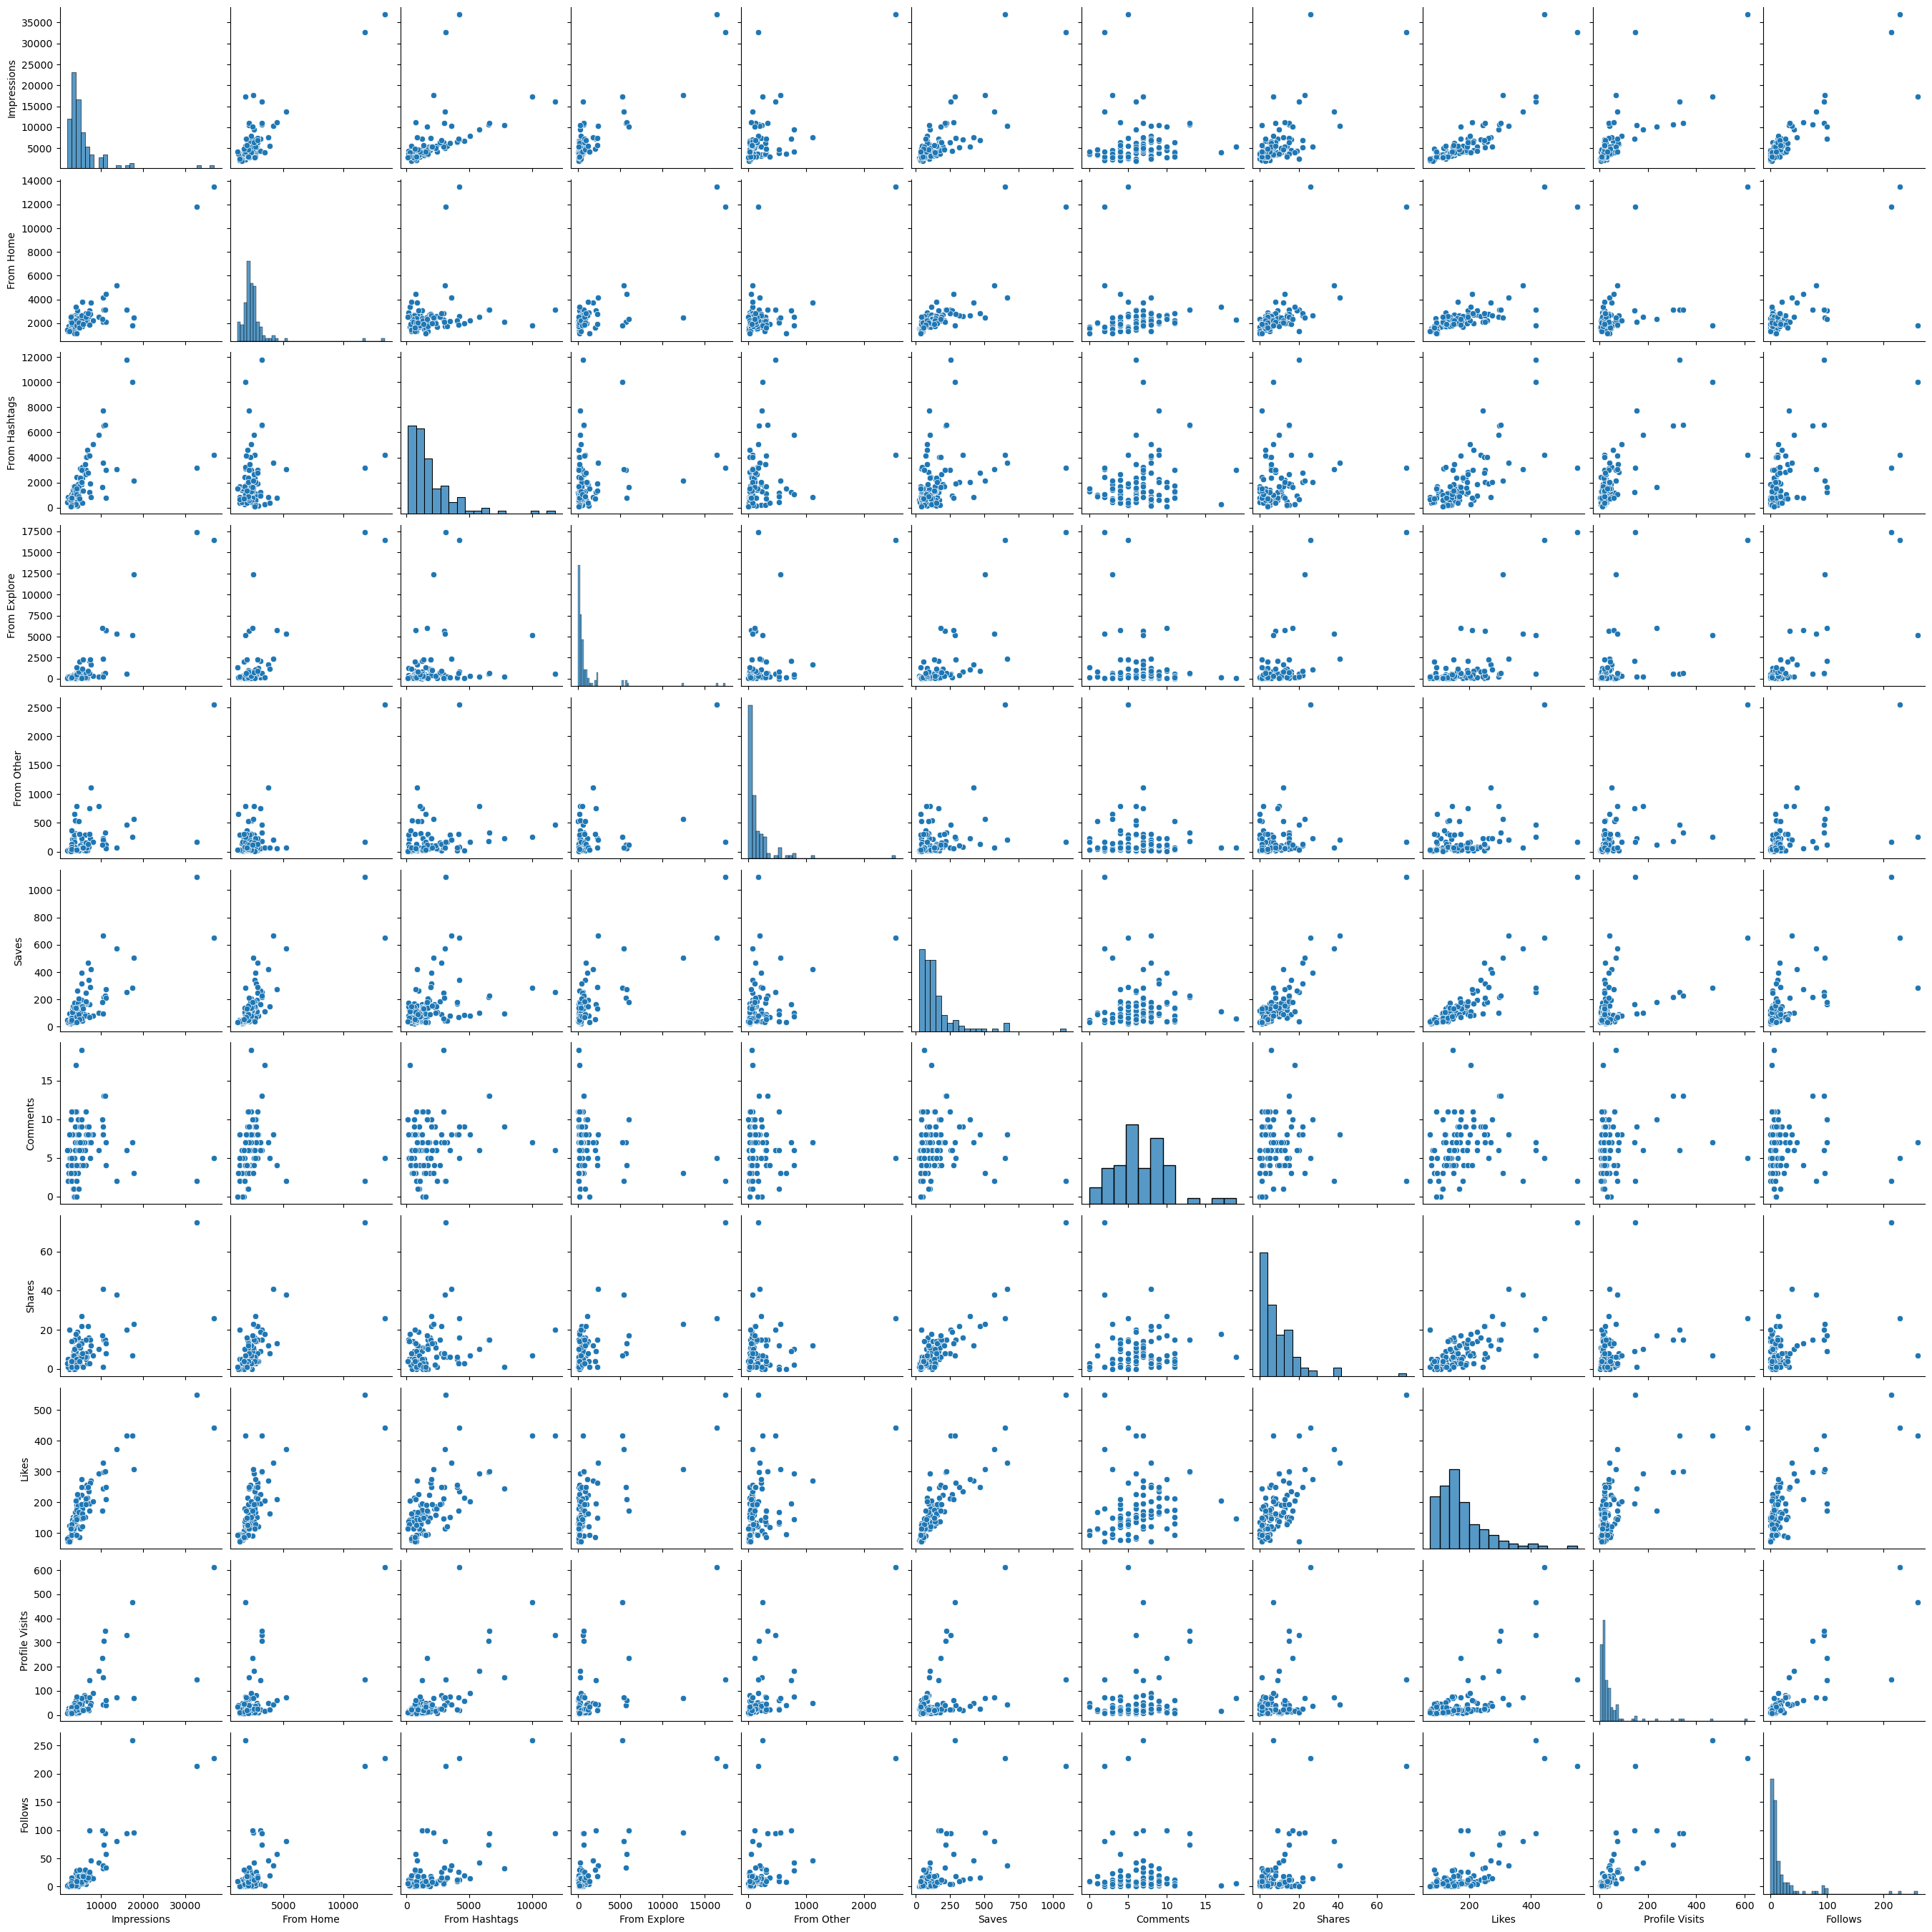

In [74]:
sns.pairplot(data)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_17792\445144541.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

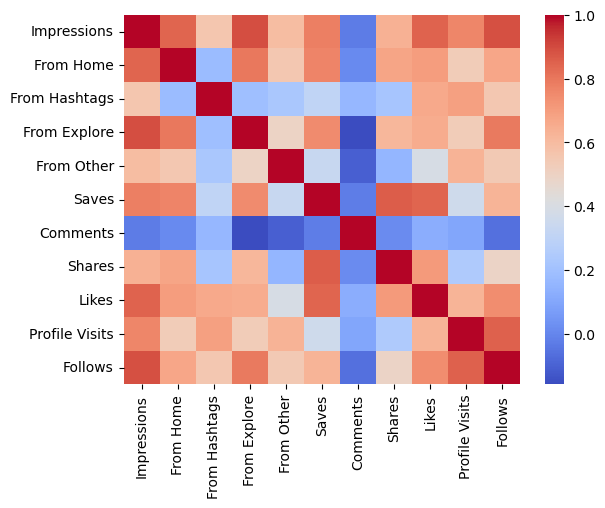

In [75]:
sns.heatmap(data.corr(),cmap="coolwarm")

<Axes: xlabel='From Hashtags', ylabel='Likes'>

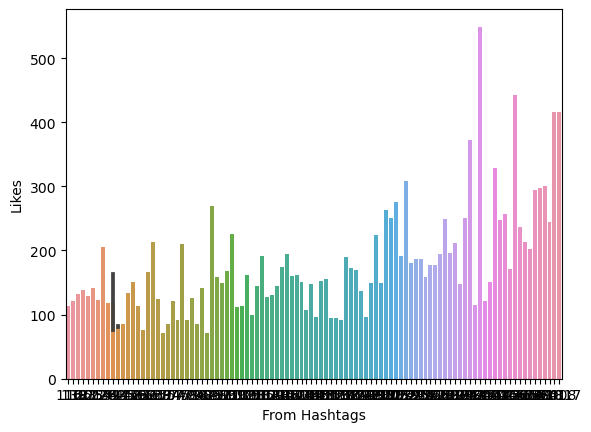

In [76]:
sns.barplot(x="From Hashtags",y="Likes",data=data)

In [77]:
like_mean=data['Likes'].mean()
like_mean

173.78151260504202

In [78]:
like_median=data['Likes'].median()
like_median

151.0

In [80]:
like_mode=data['Likes'].mode()
like_mode

0    114
1    151
Name: Likes, dtype: int64